# SAI Storylines under ARISE

In [1]:
# __authors__: Elizabeth Barnes and Patrick Keys
# __date__: Aug 01, 2022

In [1]:
import importlib as imp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime
from icecream import ic

import data_processing, plots

import cartopy as ct
import palettable
from matplotlib.colors import ListedColormap
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings

warnings.filterwarnings("ignore")

FS = 10
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rc('savefig', facecolor='white')
plt.rc('axes', facecolor='white')
plt.rc('axes', labelcolor='dimgrey')
plt.rc('axes', labelcolor='dimgrey')
plt.rc('xtick', color='dimgrey')
plt.rc('ytick', color='dimgrey')

map_proj = ct.crs.EqualEarth(central_longitude=0.)

In [2]:
TREND_YEARS_ARISE = (2035, 2044)
TREND_YEARS_CTRL = (2025, 2034)
WARMING_CUTOFF = 0.01

DATA_DIRECTORY = 'data/'
FIGURE_DIRECTORY = 'figures/'
SHAPE_DIRECTORY = 'shapefiles/'
POP_DIRECTORY = DATA_DIRECTORY + "popdynamics-1-8th-pop-base-year-projection-ssp-2000-2100-rev01-proj-ssp2-netcdf/SSP2/Total/NetCDF/"

## Get the data

In [3]:
imp.reload(data_processing)
mask = data_processing.get_land_mask(DATA_DIRECTORY + 'sftlf_fx_CESM2-WACCM_historical_r1i1p1f1_gn.nc', var="sftlf")
da_all = data_processing.get_data(DATA_DIRECTORY)
da_control = data_processing.get_control_data(DATA_DIRECTORY)

ensemble member = 001
ensemble member = 002
ensemble member = 003
ensemble member = 004
ensemble member = 005
ensemble member = 006
ensemble member = 007
ensemble member = 008
ensemble member = 009
ensemble member = 010
(10, 55, 192, 288)
ensemble member = 001
ensemble member = 002
ensemble member = 003
ensemble member = 004
ensemble member = 005
ensemble member = 006
ensemble member = 007
ensemble member = 008
ensemble member = 009
ensemble member = 010
(10, 55, 192, 288)


In [4]:
imp.reload(data_processing)
da_all_mean = da_all.mean("member")

# --------------------------------
# Control trends
da_mean_trends_cntrl = data_processing.compute_trends(da_all_mean, TREND_YEARS_CTRL[0], TREND_YEARS_CTRL[1])
ic(da_mean_trends_cntrl.shape)

da_mean_trends_cntrl20 = data_processing.compute_trends(da_all_mean, 2015, 2034)
ic(da_mean_trends_cntrl20.shape)

da_trends_cntrl = data_processing.compute_trends(da_all, TREND_YEARS_CTRL[0], TREND_YEARS_CTRL[1])
ic(da_trends_cntrl.shape)

# --------------------------------
# ARISE trends
da_mean_trends_arise = data_processing.compute_trends(da_all_mean, TREND_YEARS_ARISE[0], TREND_YEARS_ARISE[1])
ic(da_mean_trends_arise.shape)

da_mean_trends_arise35 = data_processing.compute_trends(da_all_mean, TREND_YEARS_ARISE[0], TREND_YEARS_ARISE[0] + 34)
ic(da_mean_trends_arise35.shape)

da_trends_arise = data_processing.compute_trends(da_all, TREND_YEARS_ARISE[0], TREND_YEARS_ARISE[1])
ic(da_trends_arise.shape)


ic| da_mean_trends_cntrl.shape: (2, 192, 288)
ic| da_mean_trends_cntrl20.shape: (2, 192, 288)
ic| da_trends_cntrl.shape: (2, 10, 192, 288)
ic| da_mean_trends_arise.shape: (2, 192, 288)
ic| da_mean_trends_arise35.shape: (2, 192, 288)
ic| da_trends_arise.shape: (2, 10, 192, 288)


(2, 10, 192, 288)

In [5]:
error('here')

NameError: name 'error' is not defined

## Figure 1

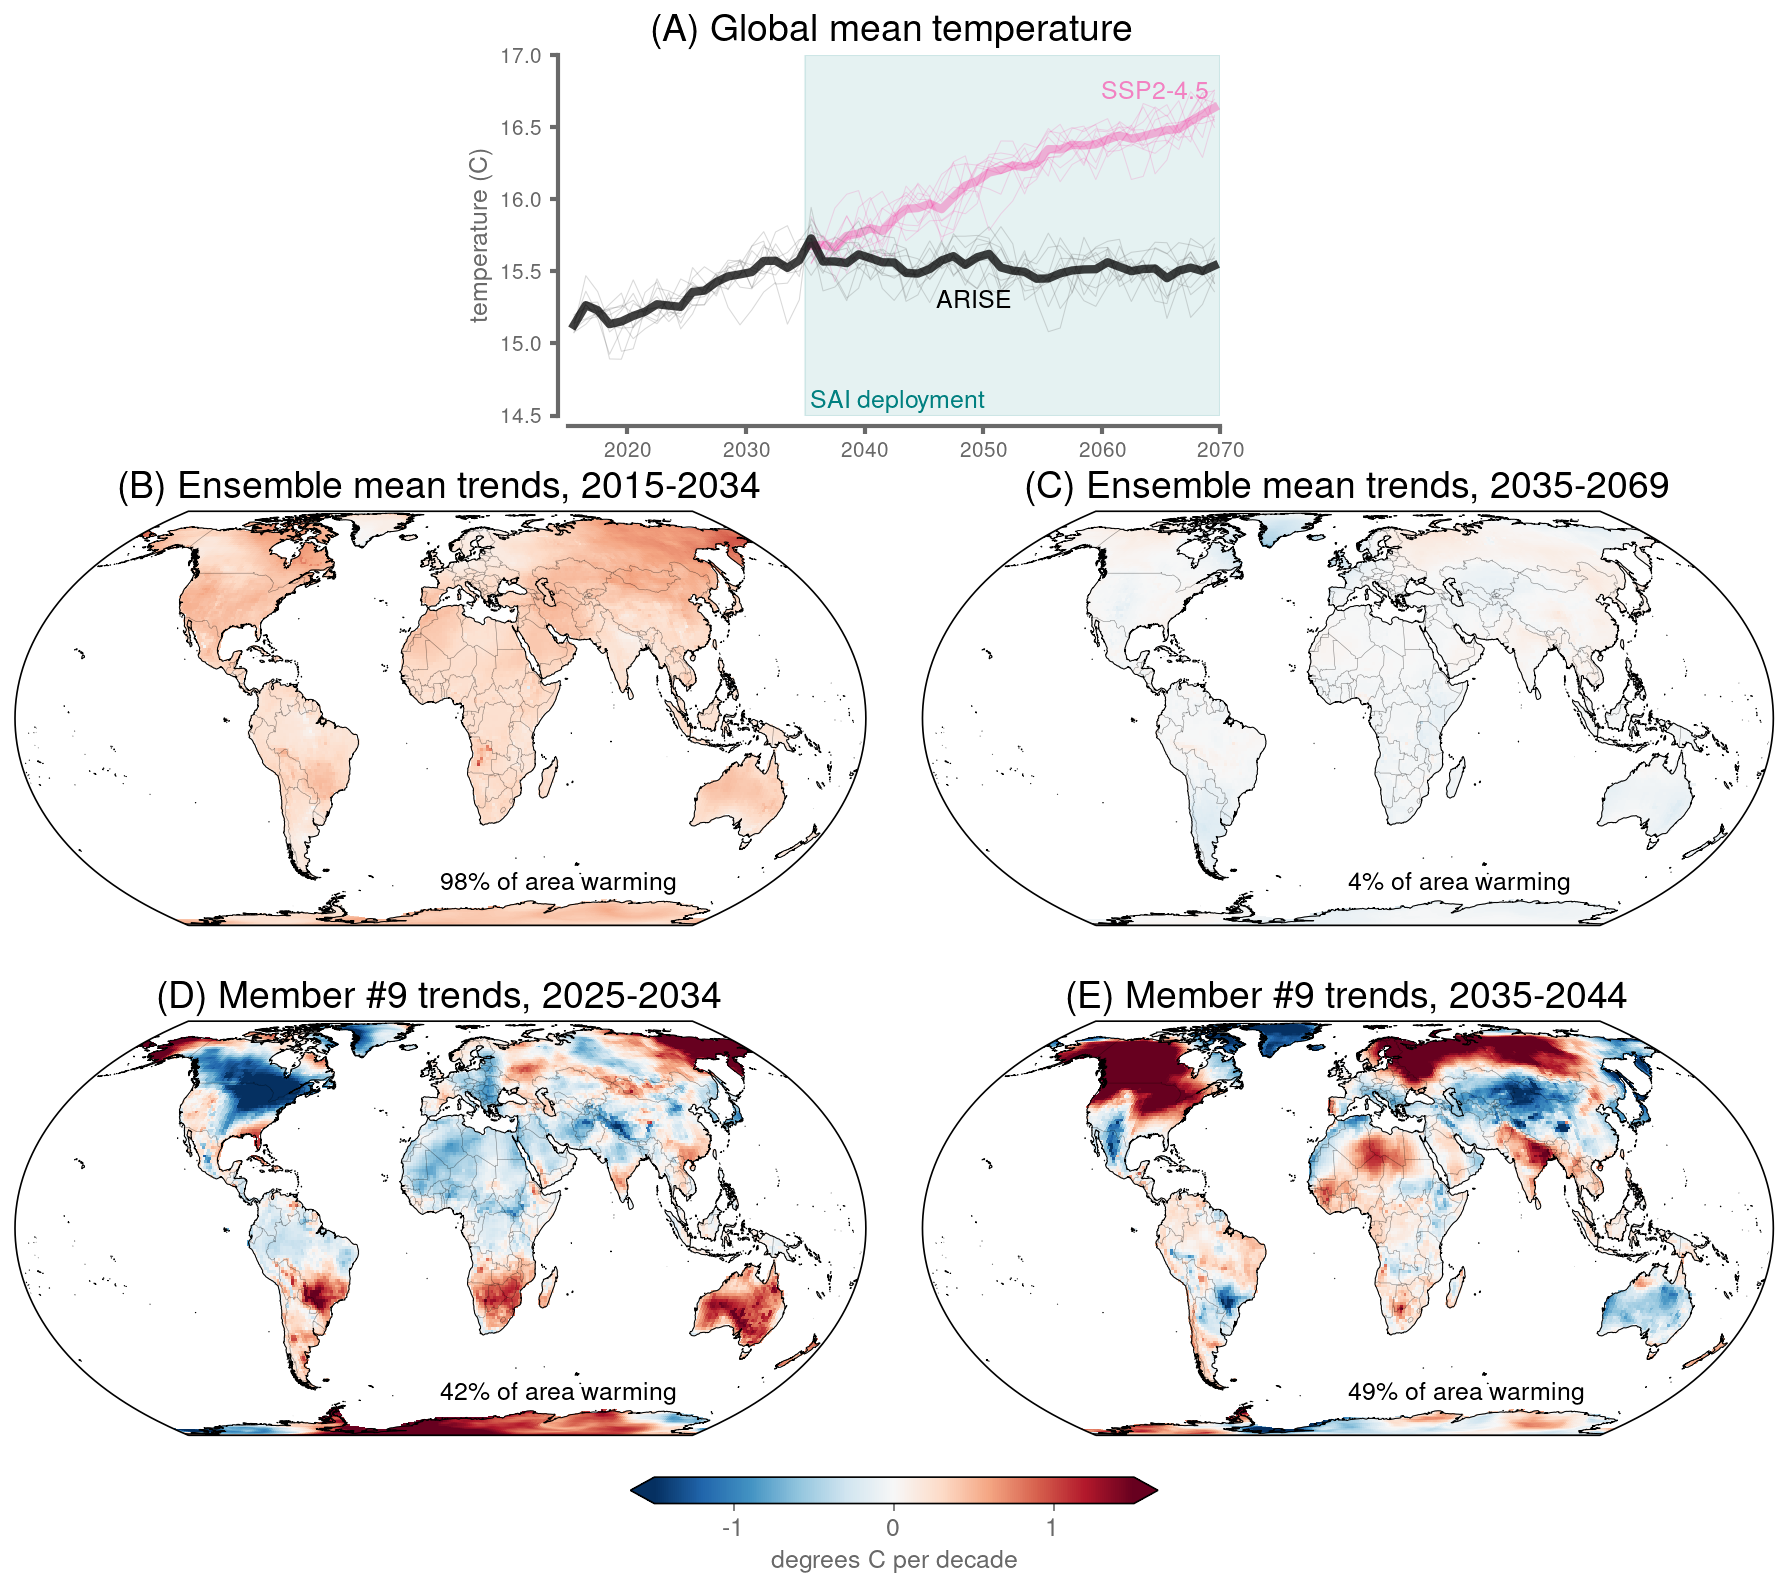

In [7]:
imp.reload(plots)
PLOT_MEMBER = 8
MULT_FACTOR = 10
FS = 12
#------------------------
# fig = plt.figure(figsize=(13,3*3))
fig = plt.figure(figsize=(5.0 * 1.5 * 2 * .8, 3.75 * 1.3 * 3 * .8))
spec = fig.add_gridspec(ncols=4, nrows=3, height_ratios=[.75, 1, 1], width_ratios=[1, .6, .6, 1])
vbound = 0.15 * MULT_FACTOR
#------------------------

ax = fig.add_subplot(spec[0, 1:3])
global_mean_temp = data_processing.compute_global_mean(da_all) - 273.15
global_mean_temp_control = data_processing.compute_global_mean(da_control) - 273.15

plt.axvspan(2035, 2070, alpha=0.1, color='teal')

iy = np.where(global_mean_temp_control["year"] >= 2035)[0]
plt.plot(global_mean_temp_control["year"][iy] + .5, global_mean_temp_control.T[iy], color='deeppink', linewidth=.5,
         alpha=.15)
plt.plot(global_mean_temp_control["year"][iy] + .5, np.mean(global_mean_temp_control, 0)[iy], color='deeppink',
         linewidth=4., alpha=.3)

plt.plot(global_mean_temp["year"] + .5, global_mean_temp.T, color='dimgray', linewidth=.5, alpha=.25)
plt.plot(global_mean_temp["year"] + .5, np.mean(global_mean_temp, 0), color='k', linewidth=4., alpha=.75)

plots.format_spines(plt.gca())
ymin, ymax = plt.gca().get_ylim()
plt.xticks(np.arange(2020, 2075, 10), np.arange(2020, 2075, 10))
plt.yticks(np.arange(10.0, 50.0, .5), np.round(np.arange(10.0, 50.0, .5), 2))
plt.ylabel('temperature (C)', fontsize=FS)
# plt.xlabel('year')    
plt.xlim(2015, 2070)
plt.ylim(14.5, 17.0)

plt.text(2035.5, 14.55, 'SAI deployment', color="teal", fontsize=FS)
plt.text(2060, 16.7, 'SSP2-4.5', color="deeppink", alpha=.5, fontsize=FS)
plt.text(2046, 15.25, 'ARISE', color="k", fontsize=FS)
plt.title('(A) Global mean temperature', fontsize=FS * 1.5)
#------------------------

for MASK_BOOL in (True,):
    for data_type in ("all", "member"):
        for start_year in (2025, 2035):

            if data_type == "member":
                if start_year == 2025:
                    da_plot = da_trends_cntrl[0, PLOT_MEMBER, :, :].squeeze()
                    title_text = "(D) Member \#" + str(PLOT_MEMBER + 1) + " trends, 2025-2034"
                    specs = (2, 0)
                elif start_year == 2035:
                    da_plot = da_trends_arise[0, PLOT_MEMBER, :, :].squeeze()
                    title_text = "(E) Member \#" + str(PLOT_MEMBER + 1) + " trends, 2035-2044"
                    specs = (2, 2)
            elif data_type == "all":
                if start_year == 2025:
                    da_plot = da_mean_trends_cntrl20[0, :, :].squeeze()
                    title_text = "(B) Ensemble mean trends, " + "2015-2034"
                    specs = (1, 0)
                elif start_year == 2035:
                    da_plot = da_mean_trends_arise35[0, :, :].squeeze()
                    title_text = "(C) Ensemble mean trends, " + "2035-2069"
                    specs = (1, 2)

            if MASK_BOOL:
                da_plot_member = da_plot * mask
                da_positive_trends = np.ceil(
                    np.abs(da_plot_member.where(da_plot_member >= WARMING_CUTOFF, 0., drop=False)))
                da_positive_trends = da_positive_trends * mask
            else:
                da_plot_member = da_plot
                da_positive_trends = np.ceil(
                    np.abs(da_plot_member.where(da_plot_member >= WARMING_CUTOFF, 0., drop=False)))
            frac = data_processing.compute_global_mean(da_positive_trends)

            ax = fig.add_subplot(spec[specs[0], specs[1]:specs[1] + 2], projection=map_proj)
            cb, image = plots.drawOnGlobe(ax,
                                          map_proj,
                                          data=da_plot_member * MULT_FACTOR,
                                          lats=da_plot_member["lat"],
                                          lons=da_plot_member["lon"],
                                          cmap='RdBu_r',
                                          vmin=-vbound,
                                          vmax=vbound,
                                          inc=None,
                                          cbarBool=False,
                                          contourMap=[],
                                          contourVals=[],
                                          fastBool=True,
                                          extent='both',
                                          )
            ax.text(0, -60, str(int((100 * frac).round())) + '\% of area warming', color='black', fontsize=FS,
                    transform=ct.crs.PlateCarree())

            image.set_clim(-vbound, vbound)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            ax.set_title(title_text, fontsize=FS * 1.5)

    #https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.tight_layout.html#matplotlib.pyplot.tight_layout
    # fig.tight_layout(rect=(0.025, 0.025, 0.95, 0.95))    #tuple (left, bottom, right, top), default: (0, 0, 1, 1); 
    # A rectangle in normalized figure coordinates into which the whole subplots area (including labels) will fit.
    fig.tight_layout(pad=1., h_pad=0., w_pad=-2)

    # set colorbar        
    axs = fig.axes
    bounds = np.round(np.arange(-.2, .29, .1), 3) * MULT_FACTOR
    cb = fig.colorbar(image, ax=axs,
                      shrink=0.3,
                      ticks=bounds,
                      location='bottom',
                      pad=.025,
                      extend='both',
                      label='degrees C per decade',
                      )
    cb.set_ticklabels(['-2', '-1', '0', '1', '2'], fontsize=FS)
    cb.set_label(label='degrees C per decade', fontsize=FS)

    # plt.tight_layout() 
    plt.savefig(FIGURE_DIRECTORY + 'four_panel_trends_member' + str(PLOT_MEMBER) + '_ensmean.png', bbox_inches='tight',
                dpi=savefig_dpi)
    plt.show()

## SUPPLEMENTAL FIGURES: Trends across all members
this code takes a while to run

In [ ]:
MULT_FACTOR = 10
vbound = 0.15 * MULT_FACTOR
#------------------------

for MASK_BOOL in (True, False):
    for sim_type in ("control", "arise"):
        fig = plt.figure(figsize=(13, 4.5 * 5))
        if sim_type == "arise":
            start_year = TREND_YEARS_ARISE[0]
            end_year = TREND_YEARS_ARISE[1]
            da_plot = da_trends_arise[0, :, :, :].squeeze()
        else:
            start_year = TREND_YEARS_CTRL[0]
            end_year = TREND_YEARS_CTRL[1]
            da_plot = da_trends_cntrl[0, :, :, :].squeeze()
        for ens in range(0, 10):

            if MASK_BOOL:
                da_plot_member = da_plot[ens, :, :] * mask
                da_positive_trends = np.ceil(
                    np.abs(da_plot_member.where(da_plot_member >= WARMING_CUTOFF, 0., drop=False)))
                da_positive_trends = da_positive_trends * mask
            else:
                da_plot_member = da_plot[ens, :, :]
                da_positive_trends = np.ceil(
                    np.abs(da_plot_member.where(da_plot_member >= WARMING_CUTOFF, 0., drop=False)))
            frac = data_processing.compute_global_mean(da_positive_trends)

            ax = fig.add_subplot(5, 2, ens + 1, projection=map_proj)
            cb, image = plots.drawOnGlobe(ax,
                                          map_proj,
                                          data=da_plot_member * MULT_FACTOR,
                                          lats=da_plot_member["lat"],
                                          lons=da_plot_member["lon"],
                                          cmap='RdBu_r',
                                          vmin=-vbound,
                                          vmax=vbound,
                                          inc=None,
                                          cbarBool=False,
                                          contourMap=[],
                                          contourVals=[],
                                          fastBool=True,
                                          extent='both',
                                          )
            ax.text(0, -60, str(int((100 * frac).round())) + '\% of area warming', color='black', fontsize=8,
                    transform=ct.crs.PlateCarree())

            ax.set_title('member \#' + str(ens + 1) + ', ' + str(start_year) + '-' + str(end_year))

        # set colorbar        
        axs = fig.axes
        bounds = np.round(np.arange(-.2, .29, .1), 3) * MULT_FACTOR
        cb = fig.colorbar(image, ax=axs,
                          shrink=0.3,
                          ticks=bounds,
                          location='bottom',
                          pad=.05,
                          extend='both',
                          label='degrees C per decade',
                          )
        cb.set_ticklabels(['-2', '-1', '0', '1', '2'])

        # plt.tight_layout()
        plt.savefig(
            FIGURE_DIRECTORY + 'supp_all_member_trends_' + str(start_year) + '_' + str(end_year) + '_mask_' + str(
                MASK_BOOL) + '.png', bbox_inches='tight', dpi=savefig_dpi)
        # plt.show()
        plt.close()

# Perceived Failures Frequency

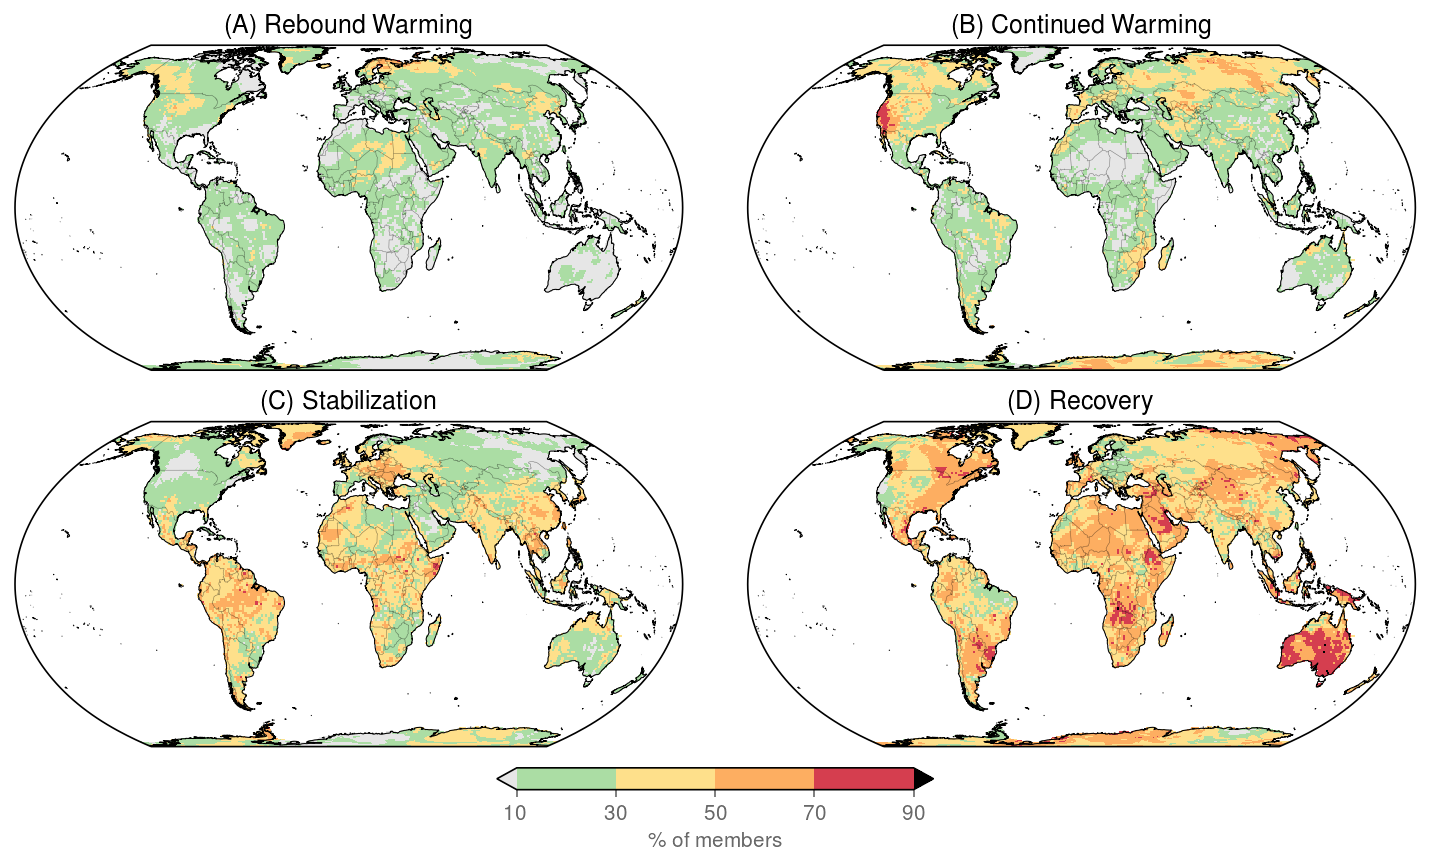

In [6]:
MASK_BOOL = True

cmap = ListedColormap(palettable.colorbrewer.qualitative.Paired_11.mpl_colors)
cmap = plots.get_qual_cmap()
cmap = palettable.colorbrewer.diverging.Spectral_8_r.mpl_colors
cmap = np.delete(cmap, (0, 1, 3, 6), 0)
cmap = ListedColormap(cmap)

fig = plt.figure(figsize=(10, 3 * 2.))

da_plot = da_trends_arise[0, :, :, :].squeeze()
da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()
da_quad_check = None
for iq, quad in enumerate((2, 1, 3, 4)):

    if (quad == 1):
        da_quad = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
        text_title = "(B) Continued Warming"
    elif (quad == 2):
        da_quad = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
        text_title = "(A) Rebound Warming"
    elif (quad == 3):
        da_quad = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
        text_title = "(C) Stabilization"
    elif (quad == 4):
        da_quad = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
        text_title = "(D) Recovery"
    da_quad = da_quad.mean("member")
    if da_quad_check is None:
        da_quad_check = da_quad
    else:
        da_quad_check = da_quad_check + da_quad
    #---------------------
    if MASK_BOOL:
        da_plot_member = da_quad * mask
    else:
        da_plot_member = da_quad

    ax = fig.add_subplot(2, 2, iq + 1, projection=map_proj)
    cb, p = plots.drawOnGlobe(ax,
                              map_proj,
                              data=da_plot_member * 100,
                              lats=da_plot_member["lat"],
                              lons=da_plot_member["lon"],
                              cmap=cmap,
                              vmin=-5,
                              vmax=105,
                              inc=None,
                              cbarBool=False,
                              contourMap=[],
                              contourVals=[],
                              fastBool=True,
                              extent='both',
                              )
    p.set_clim(10, 90)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    p.cmap.set_over('k')
    p.cmap.set_under('.9')
    # cbar = plt.colorbar(p,ax=ax,label='\% of members',ticks=np.arange(10,90+20,20), extend="both",orientation='horizontal',pad=.025,shrink=.5)
    # cbar.ax.set_xticklabels(np.arange(10,90+20,20)) 

    # p.set_clim(-5,105)
    # ax.xaxis.set_visible(False)
    # ax.yaxis.set_visible(False) 
    # plt.colorbar(p,ax=ax,label='\% of members')

    ax.set_title(text_title)

#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.tight_layout.html#matplotlib.pyplot.tight_layout
# fig.tight_layout(rect=(0.025, 0.025, 0.95, 0.95))    #tuple (left, bottom, right, top), default: (0, 0, 1, 1); 
# A rectangle in normalized figure coordinates into which the whole subplots area (including labels) will fit.
fig.tight_layout(pad=1.08, h_pad=4., w_pad=.5)
# fig.set_tight_layout(False)    

# # set colorbar 
axs = fig.axes
cb = fig.colorbar(p,
                  # cax=None,
                  #use_gridspec=True,
                  ax=axs,
                  shrink=0.3,
                  ticks=np.arange(10, 90 + 20, 20),
                  location='bottom',
                  pad=.025,
                  extend='both',
                  label='\% of members',
                  )
cb.set_ticklabels(np.arange(10, 90 + 20, 20))

plt.savefig(FIGURE_DIRECTORY + 'fourquadrant_frequencies_' + str(TREND_YEARS_ARISE[0]) + '_' + str(
    TREND_YEARS_ARISE[1]) + '.png', bbox_inches="tight", dpi=savefig_dpi)
plt.show()

# Time series Quadrants for paper

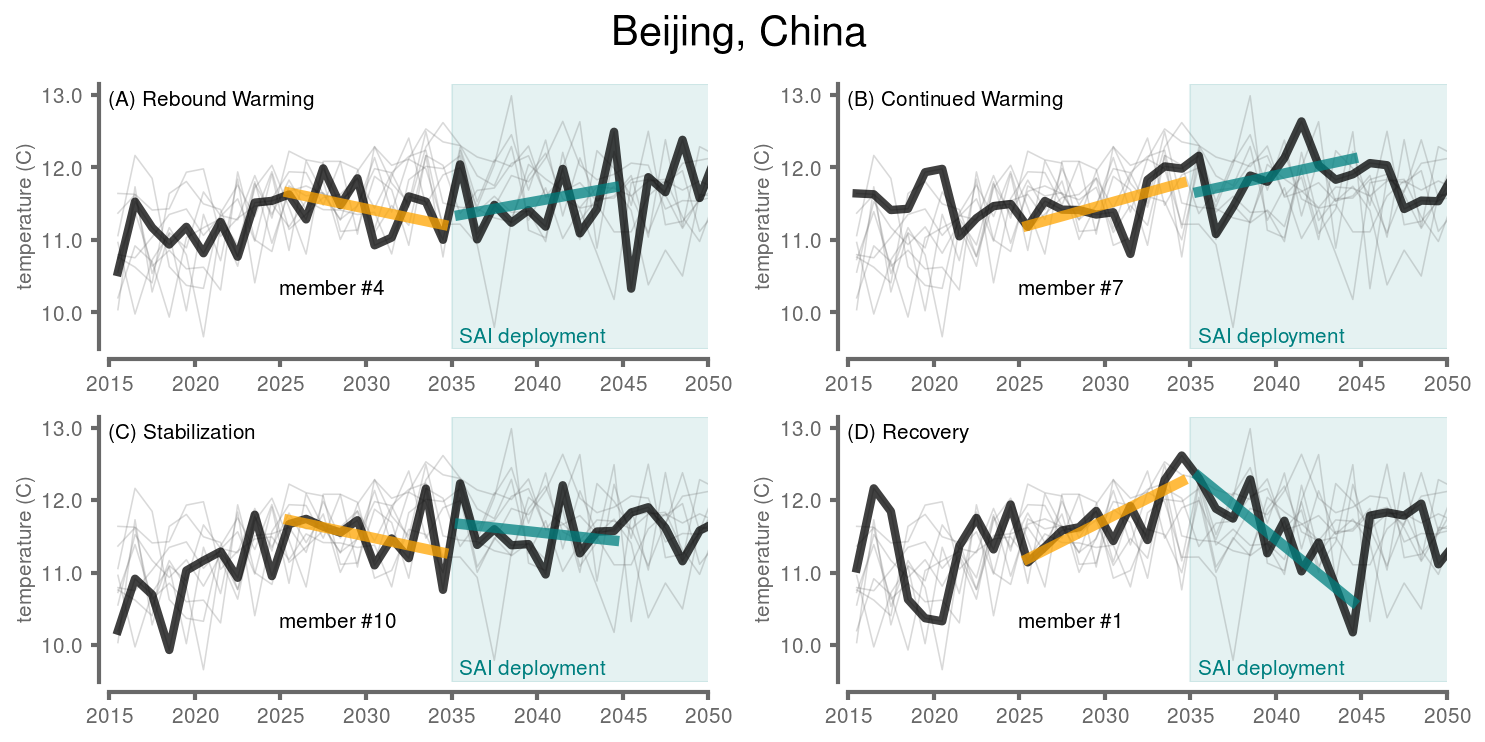

In [11]:
reg_locs = {
    # "Berlin": (52.5200, 13.4050),
    # "Delhi": (28.7041,77.1025),
    # "Shanghai": (31.2304, 121.4737),
    # "Chicago": (41.8781, 360-87.6298),
    # "Sao Paolo": (-23.5558, 360-46.6396),
    # "Lagos": (6.5244, 3.3792),
    # "Johannesburg": (-26.2041, 28.0473),
    # "Los Angeles": (34.0522, 360-118.2437),
    # "Washington D.C.": (38.9072, 360-77.0369),
    # "Mumbai": (19.0760, 72.8777),
    # "Dubai": (25.2048,55.2708),
    # "London": (51.5072,360-0.1276),
    # "WestAntarctic": (-80,360-30),
    # "San Francisco": (37.7749,360-122.4194),
    "Beijing, China": (39.9042, 116.4074),
}

PLOT_MEMBERS = (3, 6, 9, 0)
panel_letters = ('(A) Rebound Warming', '(B) Continued Warming', '(C) Stabilization', '(D) Recovery')
FS = 10

for reg in reg_locs.keys():
    lat = reg_locs[reg][0]
    lon = reg_locs[reg][1]

    plt.subplots(2, 2, figsize=(10, 5))

    for iens, ens in enumerate(PLOT_MEMBERS):
        da = da_all[ens, :, :, :].squeeze()

        ilat = np.argmin(np.abs(da["lat"].values - lat))
        ilon = np.argmin(np.abs(da["lon"].values - lon))

        ax = plt.subplot(2, 2, iens + 1)

        ax.axvspan(2035, 2070, alpha=0.1, color='teal')

        # plot all members
        plt.plot(da["year"] + .5, da_all[:, :, ilat, ilon].T,
                 color='dimgray',
                 alpha=.25,
                 linewidth=.75,
                 )

        # plot ensemble mean
        # plt.plot(da["year"],da_all[:,:,ilat,ilon].mean("member").T,
        #          color = 'k',
        #          alpha=.5,
        #          linewidth=1.,
        #         )

        # plot specific member
        plt.plot(da["year"] + .5, da[:, ilat, ilon],
                 color='black',
                 linewidth=4.,
                 alpha=.75,
                 )
        # plot control period
        trend_years = np.arange(TREND_YEARS_CTRL[0], TREND_YEARS_CTRL[1] + 1)
        plt.plot(trend_years + .5,
                 trend_years * da_trends_cntrl[0, ens, ilat, ilon].values + da_trends_cntrl[1, ens, ilat, ilon].values,
                 '-',
                 color='orange',
                 linewidth=5,
                 alpha=.75,
                 )
        # plot ARISE period
        trend_years = np.arange(2035, TREND_YEARS_ARISE[1] + 1)
        # print(da_reg[ens,iyears,0,ilat,ilon].values)
        plt.plot(trend_years + .5,
                 trend_years * da_trends_arise[0, ens, ilat, ilon].values + da_trends_arise[1, ens, ilat, ilon].values,
                 '-',
                 color='teal',
                 linewidth=5,
                 alpha=.75,
                 )

        # print(10*da_cntrl_reg[ens,0,ilat,ilon].values, 10*da_reg[ens,iyears,0,ilat,ilon].values)
        plots.format_spines(plt.gca())
        ymin, ymax = plt.gca().get_ylim()
        plt.xticks(np.arange(2015, 2055, 5), np.arange(2015, 2055, 5))
        plt.yticks(np.arange(10.0 + 273.15, 50.0 + 273.15, 1), np.round(np.arange(10.0, 50.0, 1)))
        plt.ylabel('temperature (C)')
        # plt.xlabel('year')    
        plt.xlim(2015, 2050)
        plt.ylim(ymin, ymax)

        i = np.where(da["year"] == 2046)[0]
        plt.text(2015, ymax - .3, str(panel_letters[iens]), color="k", fontsize=FS)
        plt.text(2025, ymin + .75, 'member \#' + str(ens + 1), color="k")
        plt.text(2035.5, ymin + .1, 'SAI deployment', color="teal")

    plt.suptitle(reg, fontsize=20)
    plt.tight_layout()
    plt.savefig(FIGURE_DIRECTORY + 'example_timeseries_ensmember_quadrants_' + reg + '.png', bbox_inches="tight",
                dpi=savefig_dpi)
    plt.show()
    # plt.close()

# Population and GDP figures

In [5]:
#---------------------------------------------------
# GET POPULATION
#---------------------------------------------------
# processing the raw population data and regrid it
# da_pop_regrid = data_processing.get_population(POP_DIRECTORY + "ssp2_2040.nc", da_all)
# da_pop_regrid.to_netcdf(DATA_DIRECTORY + '/ssp2_2040_regrid.nc')

da_pop_regrid = xr.load_dataarray(DATA_DIRECTORY + '/ssp2_2040_regrid.nc')

#---------------------------------------------------
# GET GDP
#---------------------------------------------------
## Only works on CPU iMac
# # Manipulate the shapefile
# import geopandas as gpd
# import regionmask

# SHAPE_DIRECTORY = 'shapefiles/'
# regs_shp = gpd.read_file(SHAPE_DIRECTORY + 'ne_10m_admin_0_countries.shp')  

# mask_country = regionmask.mask_geopandas(regs_shp, np.arange(0,360,.1), np.arange(-90,90,.1))
# mask_country.to_netcdf(SHAPE_DIRECTORY + 'countries_10m_tenthDegreeGrid.nc')

# plt.imshow(mask_country,cmap="Accent")
# plt.colorbar()
# plt.show()
# print(np.unique(mask_country),len(np.unique(mask_country)))

# mask_country = regionmask.mask_geopandas(regs_shp, da_pop_regrid.lon, da_pop_regrid.lat)
# mask_country.to_netcdf(SHAPE_DIRECTORY + 'countries_10m_cesm2Grid.nc')

# plt.imshow(mask_country,cmap="Accent")
# plt.colorbar()
# plt.show()
# print(np.unique(mask_country),len(np.unique(mask_country)))

gdp, regs_shp, country_mask = data_processing.get_gdp(SHAPE_DIRECTORY, DATA_DIRECTORY)

# Four paneled Figure 4

Bangladesh
Brazil
China
India
Nigeria
Pakistan
Russia
USA


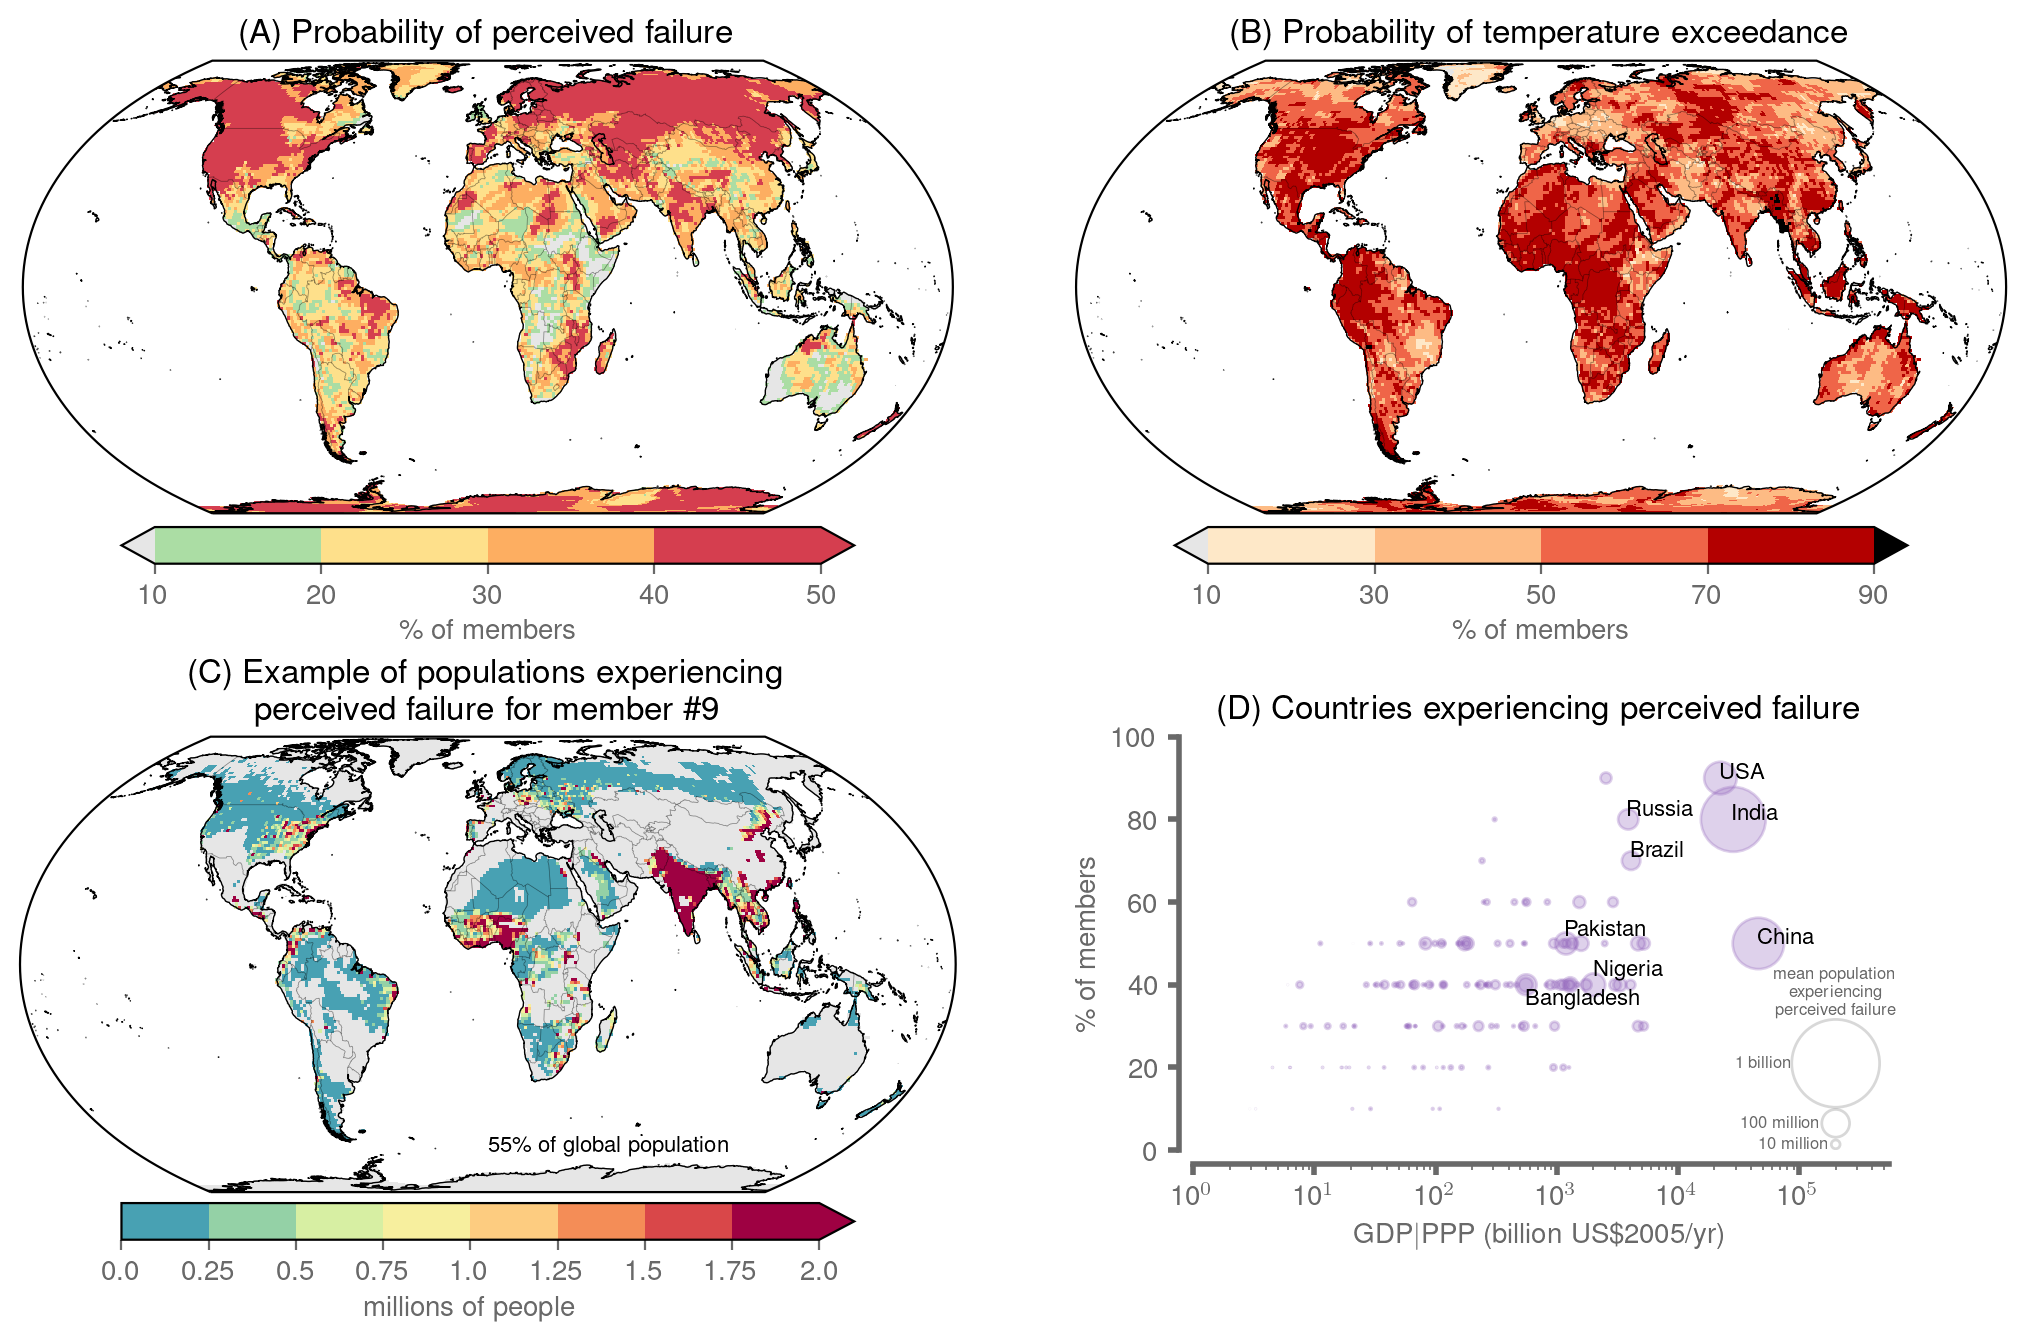

In [64]:
fig = plt.figure(figsize=(
    5.0 * 2 * 1.5 * .9 * .8,
    3.75 * 1.5 * 2 * .75 * .8),
    dpi=200,
)
spec = fig.add_gridspec(ncols=12, nrows=10)

MASK_BOOL = True

#-----------------------------------------------------------------
# PERCEIVED FAILURES
# ax = fig.add_subplot(2,2,1,projection=map_proj)
ax = fig.add_subplot(spec[:5, 0:6], projection=map_proj)

cmap = plots.get_qual_cmap()
cmap = palettable.colorbrewer.diverging.Spectral_8_r.mpl_colors
cmap = np.delete(cmap, (0, 1, 3, 6), 0)
cmap = ListedColormap(cmap)

da_plot = da_trends_arise[0, :, :, :].squeeze()
da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()

da_quad_1 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad_2 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad_3 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
da_quad_4 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
da_quad = (da_quad_1 + da_quad_2).sum("member") / len(da_plot["member"].values)

#---------------------
if MASK_BOOL:
    da_plot_member = da_quad * mask
else:
    da_plot_member = da_quad

cb, p = plots.drawOnGlobe(ax,
                          map_proj,
                          data=da_plot_member * 100,
                          lats=da_plot_member["lat"],
                          lons=da_plot_member["lon"],
                          cmap=cmap,
                          vmin=10,
                          vmax=50,
                          inc=None,
                          cbarBool=False,
                          contourMap=[],
                          contourVals=[],
                          fastBool=True,
                          extent='both',
                          )

p.set_clim(10, 50)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# p.cmap.set_over('k')
p.cmap.set_under('.9')
cbar = plt.colorbar(p, ax=ax, label='\% of members', ticks=np.arange(10, 50 + 10, 10), extend="both",
                    orientation='horizontal', pad=.025, shrink=.7)
cbar.ax.set_xticklabels(np.arange(10, 50 + 10, 10))

ax.set_title('(A) Probability of perceived failure')

#-----------------------------------------------------------------
# MAXIMUM EXCEEDANCES
# ax = fig.add_subplot(2,2,2,projection=map_proj)
ax = fig.add_subplot(spec[:5, 6:], projection=map_proj)

cmap = ListedColormap(palettable.colorbrewer.sequential.OrRd_9.mpl_colors)
cmap = cmap.colors
cmap = np.insert(cmap, 0, [[.9, .9, .9, ]], axis=0)
cmap = np.append(cmap, [[0., 0., 0., ]], axis=0)
cmap = cmap[(2, 4, 6, 8), :]
cmap = ListedColormap(cmap)

max_arise_plot = None
for PLOT_MEMBER in range(10):
    da_plot = da_all[PLOT_MEMBER, :, :, :].squeeze()

    iyears = np.where(((da_plot["year"] <= TREND_YEARS_CTRL[1])))[0]
    # print(da_plot["year"][iyears])
    max_temps = da_plot[iyears, :, :].max("year")

    iyears = np.where(((da_plot["year"] >= TREND_YEARS_ARISE[0])) & (da_plot["year"] <= TREND_YEARS_ARISE[1]))[0]
    # print(da_plot["year"][iyears])
    max_arise = xr.where(da_plot[iyears, :, :] > max_temps, 1.0, 0.0)
    max_arise = max_arise.max("year")
    if max_arise_plot is None:
        max_arise_plot = max_arise
    else:
        max_arise_plot = max_arise_plot + max_arise

cb, p = plots.drawOnGlobe(ax,
                          map_proj,
                          data=max_arise_plot * mask / 10 * 100,
                          lats=da_plot["lat"],
                          lons=da_plot["lon"],
                          cmap=cmap,
                          vmin=-5,
                          vmax=105,
                          inc=None,
                          cbarBool=False,
                          contourMap=[],
                          contourVals=[],
                          fastBool=True,
                          extent='both',
                          )
p.set_clim(10, 90)
p.cmap.set_under('.9')
p.cmap.set_over('k')
ax = plt.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
cbar = plt.colorbar(p, ax=ax, label='\% of members', ticks=np.arange(10, 110, 20), extend='both',
                    orientation='horizontal', pad=.025, shrink=.7)
cbar.ax.set_xticklabels(np.arange(10, 110, 20))
ax.set_title('(B) Probability of temperature exceedance')

#------------------------------------------------------------------------------------
# PLOT POPULATION FOR ONE MEMBER
# ax = fig.add_subplot(spec[:,0],projection=map_proj)
ax = fig.add_subplot(spec[5:, :6], projection=map_proj)
# ax = fig.add_subplot(2,2,3,projection=map_proj)

PLOT_MEMBER = 8
SCALING = 1e6
cmap = mpl.cm.get_cmap("Spectral_r", 8)
cmap = cmap(np.linspace(0, 1, 8))[1:, :]
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", cmap, 8)

da_plot = da_trends_arise[0, :, :, :].squeeze()
da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()

da_plot = da_plot[PLOT_MEMBER, :, :]
da_plot_cntrl = da_plot_cntrl[PLOT_MEMBER, :, :]

da_quad_1 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad_2 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad = da_quad_1 + da_quad_2
da_quad = da_quad * da_pop_regrid / (SCALING)
if MASK_BOOL:
    da_plot_member = da_quad * mask
else:
    da_plot_member = da_quad
da_plot_member = da_plot_member.where(da_plot_member != 0, -999)

cb, p = plots.drawOnGlobe(ax,
                          map_proj,
                          data=da_plot_member,
                          lats=da_plot_member["lat"],
                          lons=da_plot_member["lon"],
                          cmap=cmap,
                          vmin=0.001,
                          vmax=2,
                          inc=None,
                          cbarBool=False,
                          contourMap=[],
                          contourVals=[],
                          fastBool=True,
                          extent='both',
                          )

p.cmap.set_under('.9')
# p.cmap.set_over('k')
p.set_clim(0.00, 2)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
cbar = plt.colorbar(p, ax=ax, label='millions of people', ticks=np.arange(0, 2.25, .25), orientation='horizontal',
                    pad=.02, extend='max', shrink=.7)
# cbar = plt.colorbar(p,ax=ax,label='millions of people',ticks=np.arange(0,2.25,.25), orientation='horizontal',pad=.02,extend='max',shrink=.4)
cbar.ax.set_xticklabels(np.arange(0, 2.25, .25))

failure_frac = (100 * (SCALING * da_quad.sum(("lat", "lon"))) / da_pop_regrid.sum(("lat", "lon"))).values
ax.text(0, -60, str(int(failure_frac.round())) + '\% of global population', color='black', fontsize=8,
        transform=ct.crs.PlateCarree())

ax.set_title('(C) Example of populations experiencing \nperceived failure for member \#' + str(PLOT_MEMBER + 1))

#-----------------------------------------------------------------
# PLOT PROBABILITY vs GDP
ax1 = fig.add_subplot(spec[5:5 + 4, 7:11])
# ax1 = fig.add_subplot(2,2,4)

FAILURE_FRAC = .1
SCALING = 1e6
np.random.seed(43)

da_plot = da_trends_arise[0, :, :, :].squeeze()
da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()

da_quad_1 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad_2 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
da_quad_3 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
da_quad_4 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
da_quad = (da_quad_1 + da_quad_2)
# da_quad = (da_quad_1 + da_quad_2).sum("member")/len(da_plot["member"].values)

gdp_matrix = np.zeros((gdp.shape[0], 5)) * np.nan
for icountry in np.arange(0, gdp.shape[0]):

    admin = gdp["Region"][icountry]
    gdp_matrix[icountry, 0] = gdp["2040"][icountry]

    i = regs_shp[regs_shp["ADM0_A3"] == admin].index.values[0]
    da_country = country_mask.where(country_mask == i, np.nan) * 0.0 + 1.

    da_pop = da_country * da_pop_regrid
    gdp_matrix[icountry, 2] = da_pop.sum(("lat", "lon")).values

    gdp_matrix[icountry, 3] = i

    for member in range(da_all.shape[0]):
        x = da_quad[member, :, :].sum(("lat", "lon"))

        total_pop = da_pop.sum(("lat", "lon"))
        failure_pop = ((da_pop * da_quad[member, :, :]).sum(("lat", "lon"))) / total_pop
        gdp_matrix[icountry, 4] = np.nansum(
            (gdp_matrix[icountry, 4], (da_pop * da_quad[member, :, :]).sum(("lat", "lon")).values / da_all.shape[0]))
        # print(x.values,failure_pop.values,total_pop.values)    

        if failure_pop > FAILURE_FRAC:
            gdp_matrix[icountry, 1] = np.nansum((gdp_matrix[icountry, 1], .1))

ax1.scatter(gdp_matrix[:, 0], gdp_matrix[:, 1] * 100,
            # s=gdp_matrix[:,2]/SCALING,
            s=gdp_matrix[:, 4] / (SCALING),
            alpha=.3,
            color="tab:purple",
            )
for i in range(gdp_matrix.shape[0]):
    if gdp_matrix[i, 4] / SCALING > 30.:

        country_abbrv = regs_shp["ADM0_A3"][gdp_matrix[i, 3]]
        country_name = regs_shp["SOVEREIGNT"][gdp_matrix[i, 3]]
        if country_abbrv == 'USA':
            country_name = 'USA'

        shift_dict = {'Bangladesh': -5,
                      'Brazil': 1,
                      'China': 0,
                      'Egypt': -2,
                      'India': 0,
                      'Iran': -3,
                      'Nigeria': 2,
                      'Pakistan': 2,
                      'Russia': 1,
                      'USA': 0,
                      }

        ax1.annotate(country_name,
                     # (gdp_matrix[i, 0], gdp_matrix[i, 1] * 100),
                     (gdp_matrix[i, 0], gdp_matrix[i, 1] * 100 + shift_dict[country_name]),
                     # (gdp_matrix[i, 0], gdp_matrix[i, 1] * 100 * (1 + np.random.randn(1) / 30)),
                     fontsize=8,
                     color="k",
                     )
#--------------------------------------------------------
# # population legend
fs = 6
ax1.scatter((2e5, 2e5, 2e5), (1.4, 6.5, 21),
            s=(10, 100, 1000,),
            alpha=.3,
            color='white',
            edgecolor="gray",
            )
ax1.annotate('10 million', (1.75e5, 1.4), color='dimgray', fontsize=fs, horizontalalignment='right',
             verticalalignment='center')
ax1.annotate('100 million', (1.5e5, 6.5), color='dimgray', fontsize=fs, horizontalalignment='right',
             verticalalignment='center')
ax1.annotate('1 billion', (0.88e5, 21), color='dimgray', fontsize=fs, horizontalalignment='right',
             verticalalignment='center')
ax1.annotate('mean population \nexperiencing\n perceived failure', (2e5, 38), color='dimgray', fontsize=fs,
             horizontalalignment='center', verticalalignment='center')
#--------------------------------------------------------    


ax1.set_ylim(0, 100)
ax1.set_xlim(1, 5.5e5)
ax1.set_xscale('log')
ax1.set_xlabel('GDP$|$PPP (billion US\$2005/yr)')
ax1.set_ylabel('\% of members')

ax1.set_yticks(np.arange(0, 120, 20), np.arange(0, 120, 20))
# ax = plt.gca()
# labels = ax.get_xticklabels()
ax1.set_xticks((1e0, 1e1, 1e2, 1e3, 1e4, 1e5,), ('10$^0$', '10$^1$', '10$^2$', '10$^3$', '10$^4$', '10$^5$',))
ax1.set_title('(D) Countries experiencing perceived failure')
plots.format_spines(ax1)

#-----------------------------------------------------------------
fig.tight_layout(pad=1.08, h_pad=1, w_pad=-4)
# plt.tight_layout()
plt.savefig(
    FIGURE_DIRECTORY + 'fourpanel_figure4_' + str(TREND_YEARS_ARISE[0]) + '_' + str(TREND_YEARS_ARISE[1]) + '.png',
    bbox_inches="tight", dpi=savefig_dpi)
plt.show()

## SUPPLEMENTAL FIGURE: different population thresholds for scatter plot

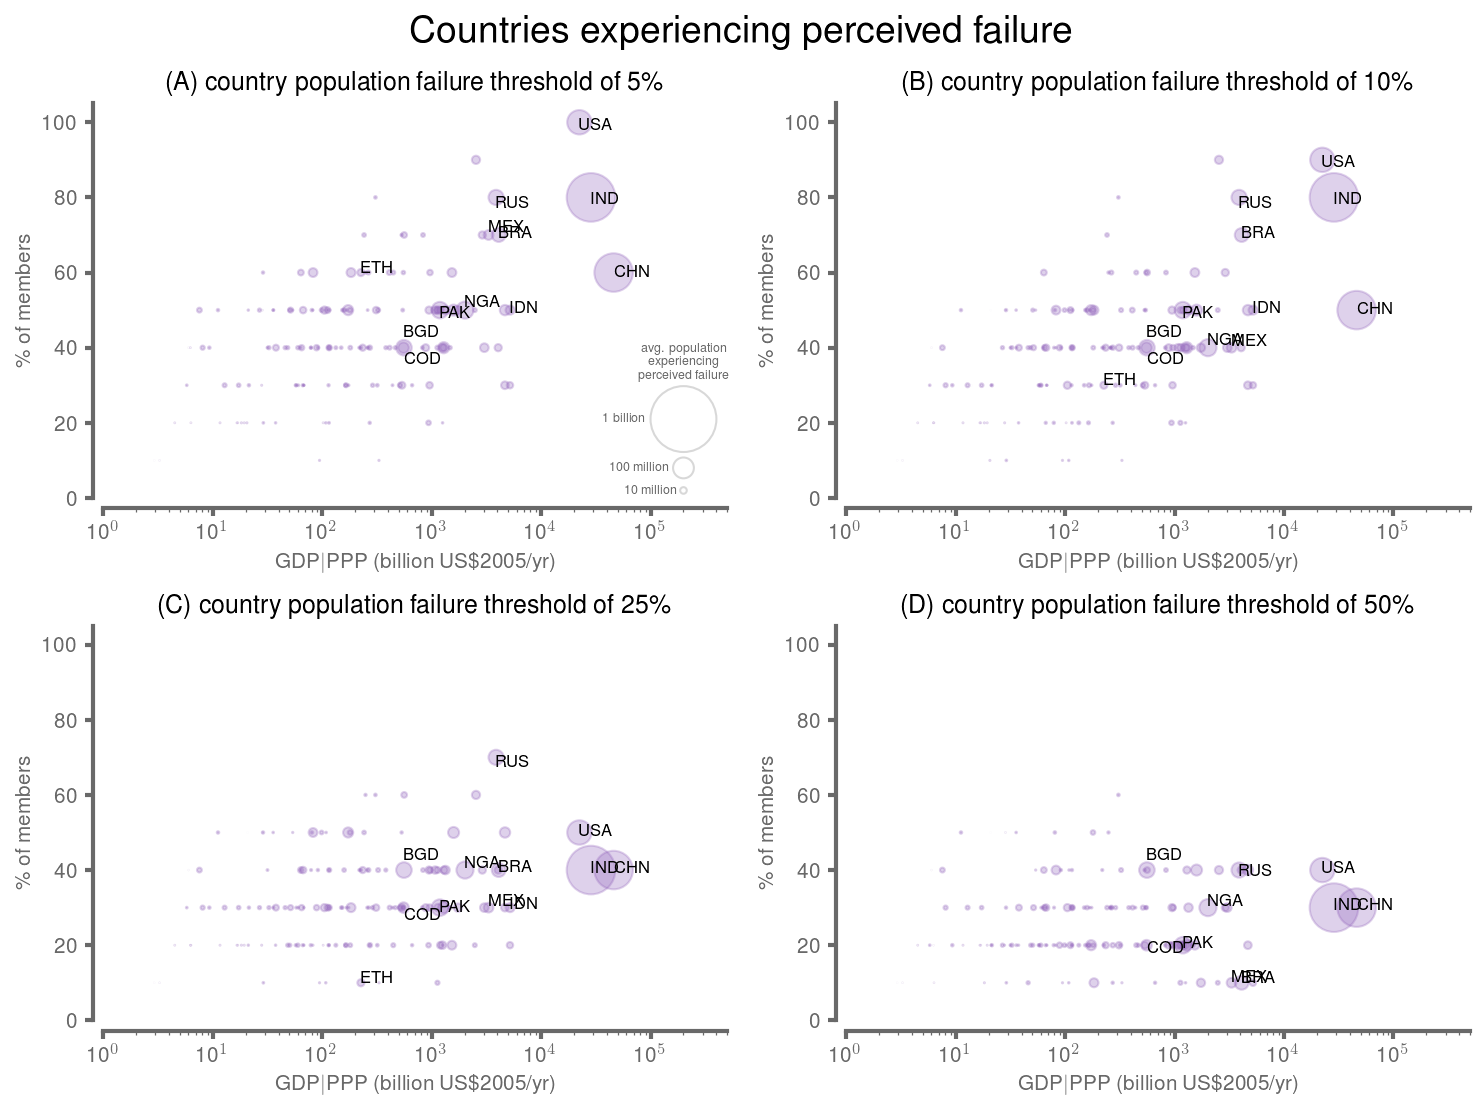

In [10]:
fig = plt.figure(figsize=(5.0 * 2, 3.75 * 2), )
spec = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1, 1])
SCALING = 1e6
letters = ['(A)', '(B)', '(C)', '(D)']

# PLOT PROBABILITY vs GDP

for k, FAILURE_FRAC in enumerate((.05, .1, .25, .5)):
    ax1 = fig.add_subplot(spec[k])
    np.random.seed(11)

    da_plot = da_trends_arise[0, :, :, :].squeeze()
    da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()

    da_quad_1 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
    da_quad_2 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
    da_quad_3 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
    da_quad_4 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot < WARMING_CUTOFF), 1, 0)
    da_quad = (da_quad_1 + da_quad_2)
    # da_quad = (da_quad_1 + da_quad_2).sum("member")/len(da_plot["member"].values)

    gdp_matrix = np.zeros((gdp.shape[0], 5)) * np.nan
    for icountry in np.arange(0, gdp.shape[0]):

        admin = gdp["Region"][icountry]
        gdp_matrix[icountry, 0] = gdp["2040"][icountry]

        i = regs_shp[regs_shp["ADM0_A3"] == admin].index.values[0]
        da_country = country_mask.where(country_mask == i, np.nan) * 0.0 + 1.

        da_pop = da_country * da_pop_regrid
        gdp_matrix[icountry, 2] = da_pop.sum(("lat", "lon")).values

        gdp_matrix[icountry, 3] = i

        for member in range(da_all.shape[0]):
            x = da_quad[member, :, :].sum(("lat", "lon"))

            total_pop = da_pop.sum(("lat", "lon"))
            failure_pop = ((da_pop * da_quad[member, :, :]).sum(("lat", "lon"))) / total_pop
            gdp_matrix[icountry, 4] = np.nansum((gdp_matrix[icountry, 4],
                                                 (da_pop * da_quad[member, :, :]).sum(("lat", "lon")).values /
                                                 da_all.shape[0]))
            # print(x.values,failure_pop.values,total_pop.values)    

            if failure_pop > FAILURE_FRAC:
                gdp_matrix[icountry, 1] = np.nansum((gdp_matrix[icountry, 1], .1))

    ax1.scatter(gdp_matrix[:, 0], gdp_matrix[:, 1] * 100,
                # s=gdp_matrix[:,2]/SCALING,
                s=gdp_matrix[:, 4] / (SCALING),
                alpha=.3,
                color="tab:purple",
                )
    for i in range(gdp_matrix.shape[0]):
        if gdp_matrix[i, 2] / SCALING > 120.:
            ax1.annotate(regs_shp["ADM0_A3"][gdp_matrix[i, 3]],
                         (gdp_matrix[i, 0], gdp_matrix[i, 1] * 100 * (1 + np.random.randn(1) / 25)),
                         fontsize=8,
                         color="k",
                         )

    #--------------------------------------------------------
    # # population legend
    if k == 0:
        fs = 6
        ax1.scatter((2e5, 2e5, 2e5), (2, 8, 21),
                    s=(10, 100, 1000,),
                    alpha=.3,
                    color='white',
                    edgecolor="gray",
                    )
        ax1.annotate('10 million', (1.75e5, 2), color='dimgray', fontsize=fs, horizontalalignment='right',
                     verticalalignment='center')
        ax1.annotate('100 million', (1.5e5, 8), color='dimgray', fontsize=fs, horizontalalignment='right',
                     verticalalignment='center')
        ax1.annotate('1 billion', (0.9e5, 21), color='dimgray', fontsize=fs, horizontalalignment='right',
                     verticalalignment='center')
        ax1.annotate('avg. population \nexperiencing\n perceived failure', (2e5, 36), color='dimgray', fontsize=fs,
                     horizontalalignment='center', verticalalignment='center')
        #--------------------------------------------------------

    ax1.set_ylim(0, 105)
    ax1.set_xlim(1, 5e5)
    ax1.set_xscale('log')
    ax1.set_xlabel('GDP$|$PPP (billion US\$2005/yr)')
    ax1.set_ylabel('\% of members')

    ax1.set_yticks(np.arange(0, 120, 20), np.arange(0, 120, 20))
    # ax = plt.gca()
    # labels = ax.get_xticklabels()
    ax1.set_xticks((1e0, 1e1, 1e2, 1e3, 1e4, 1e5,), ('10$^0$', '10$^1$', '10$^2$', '10$^3$', '10$^4$', '10$^5$',))
    ax1.set_title(letters[k] + ' country population failure threshold of ' + str(int(FAILURE_FRAC * 100)) + '\%')
    plots.format_spines(ax1)

plt.suptitle('Countries experiencing perceived failure', fontsize=18)
plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + 'supp_population_gdp_probability_varyingthresholds.png', bbox_inches="tight",
            dpi=savefig_dpi)
plt.show()

## SUPPLEMENTAL FIGURE: populations experiencing perceived failure for each member

In [ ]:
SCALING = 1e6
cmap = mpl.cm.get_cmap("Spectral_r", 8)
cmap = cmap(np.linspace(0, 1, 8))[1:, :]
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", cmap, 8)
fig = plt.figure(figsize=(13, 4.5 * 5))
#------------------------------------------------------------------------------------

for PLOT_MEMBER in np.arange(0, 10):
    da_plot = da_trends_arise[0, :, :, :].squeeze()
    da_plot_cntrl = da_trends_cntrl[0, :, :, :].squeeze()

    da_plot = da_plot[PLOT_MEMBER, :, :]
    da_plot_cntrl = da_plot_cntrl[PLOT_MEMBER, :, :]

    da_quad_1 = xr.where((da_plot_cntrl >= WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
    da_quad_2 = xr.where((da_plot_cntrl < WARMING_CUTOFF) & (da_plot >= WARMING_CUTOFF), 1, 0)
    da_quad = da_quad_1 + da_quad_2
    da_quad = da_quad * da_pop_regrid / (SCALING)
    #---------------------
    if MASK_BOOL:
        da_plot_member = da_quad * mask
    else:
        da_plot_member = da_quad
    da_plot_member = da_plot_member.where(da_plot_member != 0, -999)

    ax = fig.add_subplot(5, 2, PLOT_MEMBER + 1, projection=map_proj)
    cb, p = plots.drawOnGlobe(ax,
                              map_proj,
                              data=da_plot_member,
                              lats=da_plot_member["lat"],
                              lons=da_plot_member["lon"],
                              cmap=cmap,
                              vmin=0.001,
                              vmax=2,
                              inc=None,
                              cbarBool=False,
                              contourMap=[],
                              contourVals=[],
                              fastBool=True,
                              extent='both',
                              )

    p.cmap.set_under('.9')
    p.set_clim(0.00, 2)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    cbar = plt.colorbar(p, ax=ax, label='millions of people', ticks=np.arange(0, 2.25, .25), orientation='horizontal',
                        pad=.025, extend='max', shrink=.7)
    cbar.ax.set_xticklabels(np.arange(0, 2.25, .25))

    failure_frac = (100 * (SCALING * da_quad.sum(("lat", "lon"))) / da_pop_regrid.sum(("lat", "lon"))).values
    ax.text(0, -60, str(int(failure_frac.round())) + '\% of global population', color='black', fontsize=8,
            transform=ct.crs.PlateCarree())

    ax.set_title('Member \#' + str(PLOT_MEMBER + 1))

plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + 'supp_population_failures_' + str(TREND_YEARS_ARISE[0]) + '_' + str(
    TREND_YEARS_ARISE[1]) + '.png', bbox_inches="tight", dpi=savefig_dpi)
# plt.show()
plt.close()